# 三明のノートブック
## 分析内容
視聴時間毎の文末における「草」の頻度分析

## 前処理
### 汎用的なものをimport

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime as dt

### データの読み込み

In [2]:
df_comment = pd.read_csv("./data/comments.csv", header=0, index_col=None, parse_dates=["inserted_at"])

### 時間とコメントのみの分析

In [3]:
# データの切り出し
df_com_time  = df_comment[["inserted_at","message"]].copy()
df_com_time["inserted_at"] = pd.to_datetime(df_com_time["inserted_at"],utc=True)
# 日本時間にする
df_com_time.index = pd.DatetimeIndex(df_com_time.inserted_at, name="inserted_at")
df_com_time.index = df_com_time.index.tz_convert("Asia/Tokyo")
df_comment_time = df_com_time[["message"]].copy()
df_comment_time

#df_com_time.inserted_at = df_com_time.index
# df_com_time.index = df_com_time.index.strftime('%Y年%m月%d日 %H時%M分%S秒') # 日本時間に変換できているかの確認用
# df_comment_time = df_com_time.reset_index(drop=True).copy()

,message
inserted_at,
2021-11-01 00:00:16+09:00,アニメ化おめでとう！！！！！
2021-11-01 00:00:30+09:00,アニメ化おめでとう！！まじか？！
2021-11-01 00:00:35+09:00,遂にアニメ化来た！おめでとう！！！！
2021-11-01 00:00:40+09:00,やっぱりアニメ化か！おめでとうございます🎊
2021-11-01 00:00:41+09:00,おめでとうアニメ化！アーニャ可愛いなぁ
...,...
2022-03-31 18:27:27+09:00,キャラデザすごすぎぃ…ウルト○マンに出てくる怪獣みたいに洗練されてるじゃん…
2022-03-31 18:47:30+09:00,雷(トニト)一閃は草
2022-03-31 19:18:28+09:00,ジジは何食べてそんなにデカくなったんだ


### 文末が特定のワードのものを抜き出す  
抜き出すワード  
- 草
- w
- 笑

In [4]:
df_only_target = df_comment_time[df_comment_time["message"].str.match('.*(草|w|笑)$')]
df_only_target

,message
inserted_at,
2021-11-01 00:02:34+09:00,12P完璧にどっかの骨川で草
2021-11-01 00:02:46+09:00,コメ欄でアニメ化を知って感想吹き飛んだ笑
2021-11-01 00:03:42+09:00,うんこが漏れそうは草
2021-11-01 00:05:14+09:00,ハナクソ草
2021-11-01 00:05:23+09:00,残りのうんこ爆弾が…www
...,...
2022-03-31 13:04:39+09:00,ペニーチンコスw
2022-03-31 13:53:46+09:00,トニとおばさんなんか好きww
2022-03-31 16:09:38+09:00,らんまw


## 人がよく「w,草,笑」を文末で使う時間帯の可視化
### 時間帯ごとのデータの切り方の例

In [5]:
hoge = df_only_target.between_time("0:00:00", "6:00:00")
hoge.index = hoge.index.strftime('%Y年%m月%d日 %H時%M分%S秒') # 日本時間に変換できているかの確認用

### 2時間毎にデータの内訳を確認

In [6]:
delimitation = list(range(0,24,2))
delimitation.append(0)
total_arr = []
target_arr = []
rate_arr = []
for i in range(len(delimitation) - 1):
    total_num = df_comment_time.between_time("{}:00:00".format(delimitation[i]),
                                             "{}:00:00".format(delimitation[i+1])).shape[0]
    target_num = df_only_target.between_time("{}:00:00".format(delimitation[i]),
                                             "{}:00:00".format(delimitation[i+1])).shape[0]
    total_arr.append(total_num)
    target_arr.append(target_num)
    rate_arr.append(target_num / total_num * 100)
    print("{0}時 - {1}時\t| {2:.2f}% \ttotal: {3}, \ttarget: {4}".format(delimitation[i],
                                                                        delimitation[i+1],
                                                                        rate_arr[-1], 
                                                                        total_num,
                                                                        target_num))

0時 - 2時	| 5.79% 	total: 40676, 	target: 2355
2時 - 4時	| 5.08% 	total: 6402, 	target: 325
4時 - 6時	| 4.86% 	total: 3433, 	target: 167
6時 - 8時	| 5.10% 	total: 7764, 	target: 396
8時 - 10時	| 5.57% 	total: 9013, 	target: 502
10時 - 12時	| 6.11% 	total: 6347, 	target: 388
12時 - 14時	| 6.16% 	total: 6412, 	target: 395
14時 - 16時	| 7.02% 	total: 4204, 	target: 295
16時 - 18時	| 6.22% 	total: 3984, 	target: 248
18時 - 20時	| 5.75% 	total: 4139, 	target: 238
20時 - 22時	| 5.41% 	total: 4440, 	target: 240
22時 - 0時	| 6.45% 	total: 4406, 	target: 284


### ヒストグラムの描画
#### 全てのコメント数

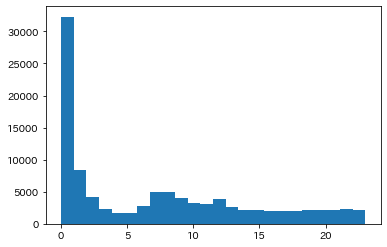

In [7]:
plt.hist(np.asarray(df_comment_time.index.hour), bins=24)
plt.show()

#### 対象となるコメント数

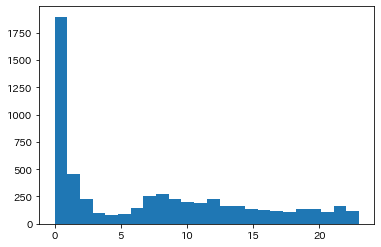

In [8]:
plt.hist(np.asarray(df_only_target.index.hour), bins=24)
plt.show()

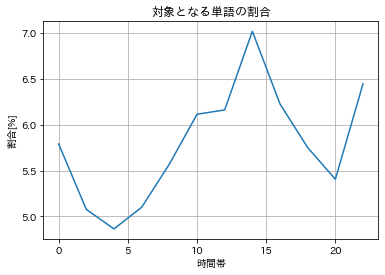

In [9]:
plt.plot(delimitation[:-1], rate_arr)
plt.title("対象となる単語の割合")
plt.xlabel("時間帯") 
plt.ylabel("割合[%]") 
plt.grid(True)